In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

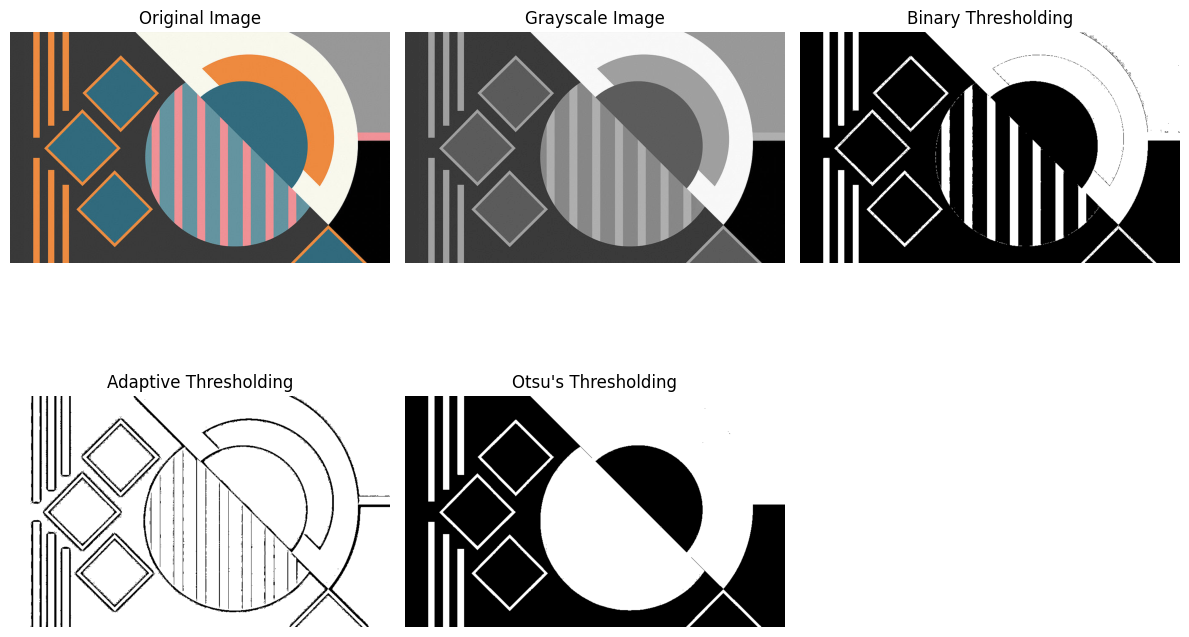

In [37]:
## loading Color image
image_path="/content/drive/MyDrive/Digital_Image_Processing_Assignment/SohamSaha_DIP_Assignment_4/images/art.jpg"
color_img= cv2.imread(image_path)

## Converting to grayscale image
gray_image=cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# Binary Thresholding
_,binary_thresh = cv2.threshold(gray_image, 147, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10
)

# Otsu’s Thresholding
_,otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


titles = ["Original Image", "Grayscale Image", "Binary Thresholding", "Adaptive Thresholding", "Otsu's Thresholding"]
images = [color_img, gray_image, binary_thresh, adaptive_thresh, otsu_thresh]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    if len(images[i].shape) == 2:  # Grayscale images
        plt.imshow(images[i], cmap="gray")
    else:  # Color image
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()



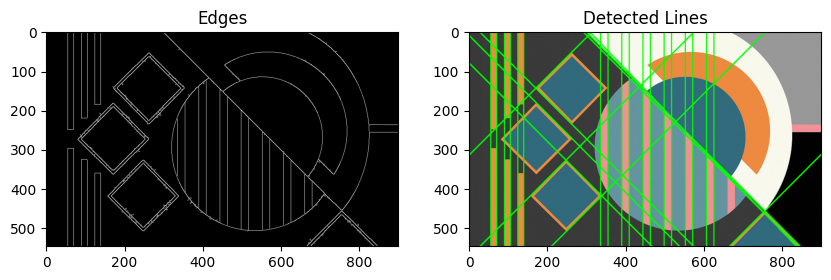

In [42]:


def detect_lines(image_path):
    # Load the image in grayscale
    road = cv2.imread(image_path)
    road_gray = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(road_gray, 30, 150, apertureSize=3)

    # Apply Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Draw the lines on the original image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(road, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return road, edges

# Example usage

processed_image, edges = detect_lines(image_path)

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.show()


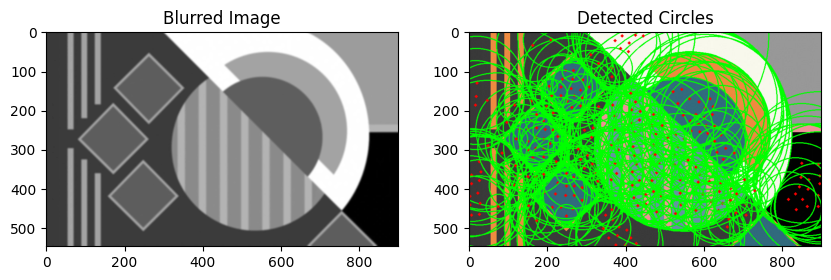

In [46]:
def detect_circles(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Detect circles using Hough Transform
    circles = cv2.HoughCircles(
        gray_blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=20,
        param2=30,
        minRadius=0,
        maxRadius=0
    )

    # Draw the detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # x, y center
            radius = circle[2]              # radius
            cv2.circle(image, center, radius, (0, 255, 0), 2)  # Circle outline
            cv2.circle(image, center, 2, (0, 0, 255), 3)      # Circle center

    return image, gray_blurred

# Example usage
processed_image, blurred = detect_circles(image_path)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Blurred Image")
plt.imshow(blurred, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Detected Circles")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.show()


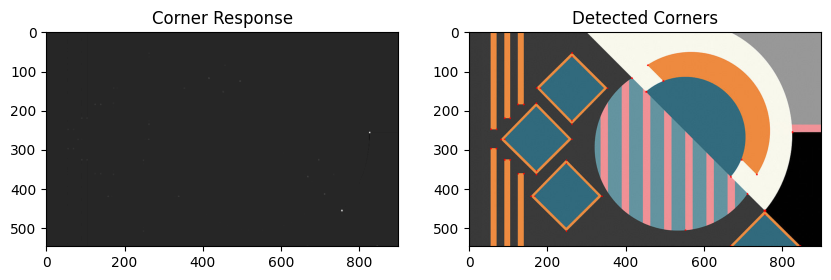

In [52]:
def detect_corners(image_path):
    """ Detects and marks corners in an image using Harris Corner Detection.

    Args:
        image_path (str): Path to the input image.
        block_size (int): Size of the neighborhood considered for corner detection.
        ksize (int): Aperture parameter for the Sobel operator.
        k (float): Harris detector free parameter (sensitivity).
        threshold (float): Relative threshold to mark corners.

    Returns:
        original_img (numpy.ndarray): Original image with corners marked.
        corners (numpy.ndarray): Harris corner response matrix.
    """
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Apply Harris Corner Detection
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Dilate the corner points for visibility
    dst = cv2.dilate(dst, None)

    # Threshold for marking corners
    image[dst > 0.01 * dst.max()] = [0, 0, 255]

    return image, dst

# Example usage
processed_image, corners = detect_corners(image_path)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Corner Response")
plt.imshow(corners, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Detected Corners")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.show()
